# **Exploratory Data Analysis**

This notebook explore the data to be used in the project and performs any pre-processing necessary to build a machine learning model.

## **Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## **Basic EDA**

Let's first look at some basic EDA to get a grasp of the data. Let's first load the data:

In [2]:
# Load the data
df = pd.read_csv('data/measures_v2.csv')
df.head()

u_q    coolant  stator_winding       u_d  stator_tooth  motor_speed  \
0 -0.450682  18.805172       19.086670 -0.350055     18.293219     0.002866   
1 -0.325737  18.818571       19.092390 -0.305803     18.294807     0.000257   
2 -0.440864  18.828770       19.089380 -0.372503     18.294094     0.002355   
3 -0.327026  18.835567       19.083031 -0.316199     18.292542     0.006105   
4 -0.471150  18.857033       19.082525 -0.332272     18.291428     0.003133   

        i_d       i_q         pm  stator_yoke    ambient    torque  profile_id  
0  0.004419  0.000328  24.554214    18.316547  19.850691  0.187101          17  
1  0.000606 -0.000785  24.538078    18.314955  19.850672  0.245417          17  
2  0.001290  0.000386  24.544693    18.326307  19.850657  0.176615          17  
3  0.000026  0.002046  24.554018    18.330833  19.850647  0.238303          17  
4 -0.064317  0.037184  24.565397    18.326662  19.850639  0.208197          17

In [3]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 1330816 rows and 13 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


After loading the data we can drop any columns that are irrelevant to the study.

In [5]:
# Drop columns that are not needed from initial analysis
cols_to_drop = ['profile_id']
df = df.drop(cols_to_drop, axis=1)
df.head()

u_q    coolant  stator_winding       u_d  stator_tooth  motor_speed  \
0 -0.450682  18.805172       19.086670 -0.350055     18.293219     0.002866   
1 -0.325737  18.818571       19.092390 -0.305803     18.294807     0.000257   
2 -0.440864  18.828770       19.089380 -0.372503     18.294094     0.002355   
3 -0.327026  18.835567       19.083031 -0.316199     18.292542     0.006105   
4 -0.471150  18.857033       19.082525 -0.332272     18.291428     0.003133   

        i_d       i_q         pm  stator_yoke    ambient    torque  
0  0.004419  0.000328  24.554214    18.316547  19.850691  0.187101  
1  0.000606 -0.000785  24.538078    18.314955  19.850672  0.245417  
2  0.001290  0.000386  24.544693    18.326307  19.850657  0.176615  
3  0.000026  0.002046  24.554018    18.330833  19.850647  0.238303  
4 -0.064317  0.037184  24.565397    18.326662  19.850639  0.208197

Let's reorder the columns to group features for visual fidelity.

In [6]:
# Reorder columns for ease of analysis
columns_order = [
    'u_q', 
    'u_d', 
    'i_q', 
    'i_d', 
    'motor_speed', 
    'torque',
    'ambient', 
    'coolant', 
    'stator_yoke', 
    'stator_winding', 
    'stator_tooth', 
    'pm'
]
df = df[columns_order]
df.head()

u_q       u_d       i_q       i_d  motor_speed    torque    ambient  \
0 -0.450682 -0.350055  0.000328  0.004419     0.002866  0.187101  19.850691   
1 -0.325737 -0.305803 -0.000785  0.000606     0.000257  0.245417  19.850672   
2 -0.440864 -0.372503  0.000386  0.001290     0.002355  0.176615  19.850657   
3 -0.327026 -0.316199  0.002046  0.000026     0.006105  0.238303  19.850647   
4 -0.471150 -0.332272  0.037184 -0.064317     0.003133  0.208197  19.850639   

     coolant  stator_yoke  stator_winding  stator_tooth         pm  
0  18.805172    18.316547       19.086670     18.293219  24.554214  
1  18.818571    18.314955       19.092390     18.294807  24.538078  
2  18.828770    18.326307       19.089380     18.294094  24.544693  
3  18.835567    18.330833       19.083031     18.292542  24.554018  
4  18.857033    18.326662       19.082525     18.291428  24.565397

Next we can check if any of these columns have missing values.

In [7]:
# Check for missing values
df.isna().sum()

u_q               0
u_d               0
i_q               0
i_d               0
motor_speed       0
torque            0
ambient           0
coolant           0
stator_yoke       0
stator_winding    0
stator_tooth      0
pm                0
dtype: int64

Let's numerically explore the distribution of each column.

In [8]:
df.describe()

u_q           u_d           i_q           i_d   motor_speed  \
count  1.330816e+06  1.330816e+06  1.330816e+06  1.330816e+06  1.330816e+06   
mean   5.427900e+01 -2.513381e+01  3.741278e+01 -6.871681e+01  2.202081e+03   
std    4.417323e+01  6.309197e+01  9.218188e+01  6.493323e+01  1.859663e+03   
min   -2.529093e+01 -1.315304e+02 -2.934268e+02 -2.780036e+02 -2.755491e+02   
25%    1.206992e+01 -7.869090e+01  1.095863e+00 -1.154061e+02  3.171107e+02   
50%    4.893818e+01 -7.429755e+00  1.577401e+01 -5.109376e+01  1.999977e+03   
75%    9.003439e+01  1.470271e+00  1.006121e+02 -2.979688e+00  3.760639e+03   
max    1.330370e+02  1.314698e+02  3.017079e+02  5.189670e-02  6.000015e+03   

             torque       ambient       coolant   stator_yoke  stator_winding  \
count  1.330816e+06  1.330816e+06  1.330816e+06  1.330816e+06    1.330816e+06   
mean   3.110603e+01  2.456526e+01  3.622999e+01  4.818796e+01    6.634275e+01   
std    7.713575e+01  1.929522e+00  2.178615e+01  1.999100e+01    2.867206e+01   
min   -2.464667e+02  8.783478e+00  1.062375e+01  1.807669e+01    1.858582e+01   
25%   -1.374265e-01  2.318480e+01  1.869814e+01  3.199033e+01    4.278796e+01   
50%    1.086035e+01  2.479733e+01  2.690014e+01  4.562551e+01    6.511013e+01   
75%    9.159718e+01  2.621702e+01  4.985749e+01  6.146083e+01    8.814114e+01   
max    2.610057e+02  3.071420e+01  1.015985e+02  1.011480e+02    1.413629e+02   

       stator_tooth            pm  
count  1.330816e+06  1.330816e+06  
mean   5.687858e+01  5.850678e+01  
std    2.295223e+01  1.900150e+01  
min    1.813398e+01  2.085696e+01  
25%    3.841601e+01  4.315158e+01  
50%    5.603635e+01  6.026629e+01  
75%    7.558668e+01  7.200837e+01  
max    1.119464e+02  1.136066e+02

Each column seems to have a wide range of values that differ from one another. Let's investigate the ranges:

In [9]:
# Find range of values for each column
for col in df.columns:
    range = df[col].max() - df[col].min()
    print(f'{col}: {range:.2f}')

u_q: 158.33
u_d: 263.00
i_q: 595.13
i_d: 278.06
motor_speed: 6275.56
torque: 507.47
ambient: 21.93
coolant: 90.97
stator_yoke: 83.07
stator_winding: 122.78
stator_tooth: 93.81
pm: 92.75


We see that there is a large difference in ranges column to column. This means that we should **scale** our data such that features with large orders of magnitude do not overpower the lower magnitude features during data preprocessing. Let's create some box plots to get a better idea of the distributions, ranges, and outliers.

## **Box Plots**

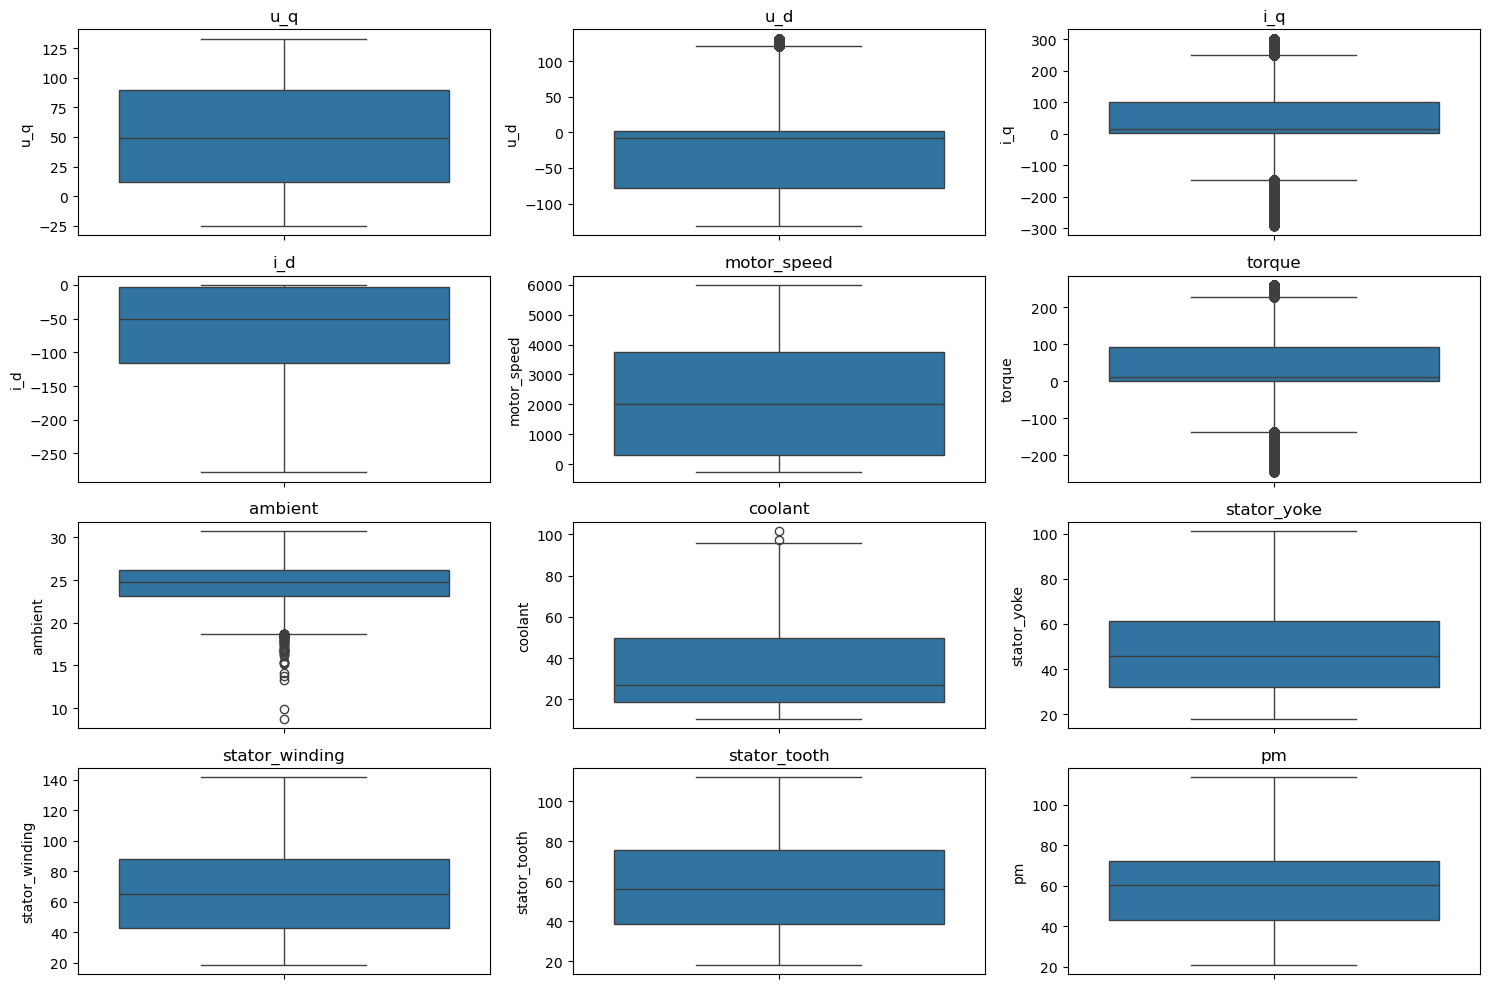

In [10]:
# Create boxplots for each column in the dataframe
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## **Feature Distributions**

Let's take a look at how the features are distributed to get a sense of their general shapes.

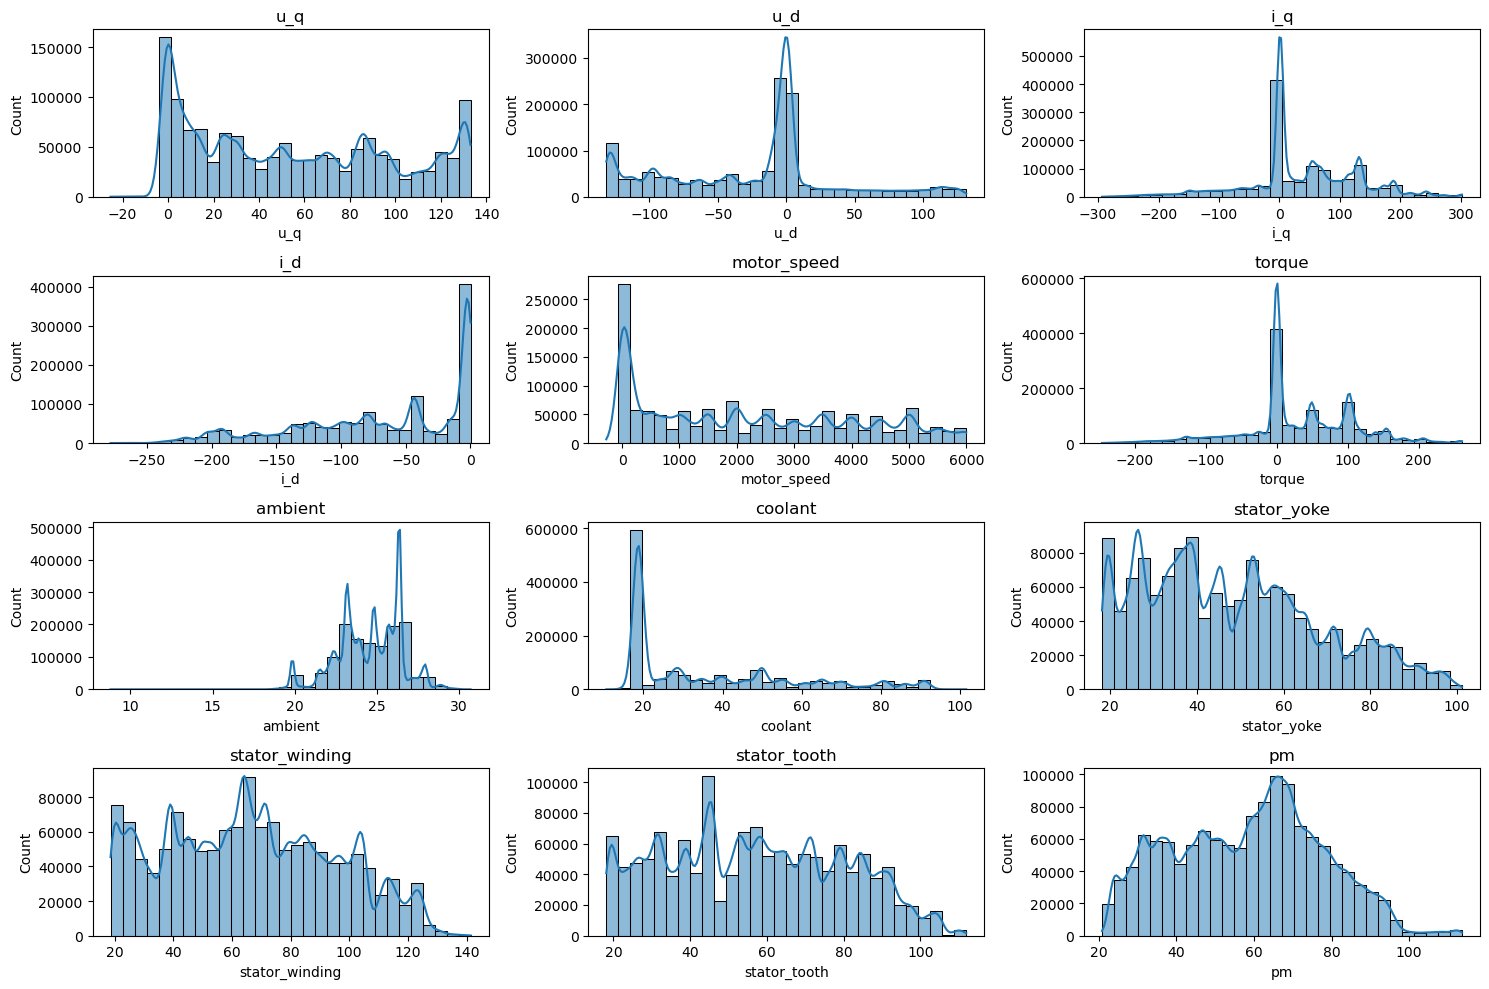

In [11]:
# Create histograms for each column in the dataframe
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Since we have a very large number of observations, we can take a random sample of a proportion of the data to plot singular observations. Our original data has 1,330,816 observations so lets sample 10% of the data.

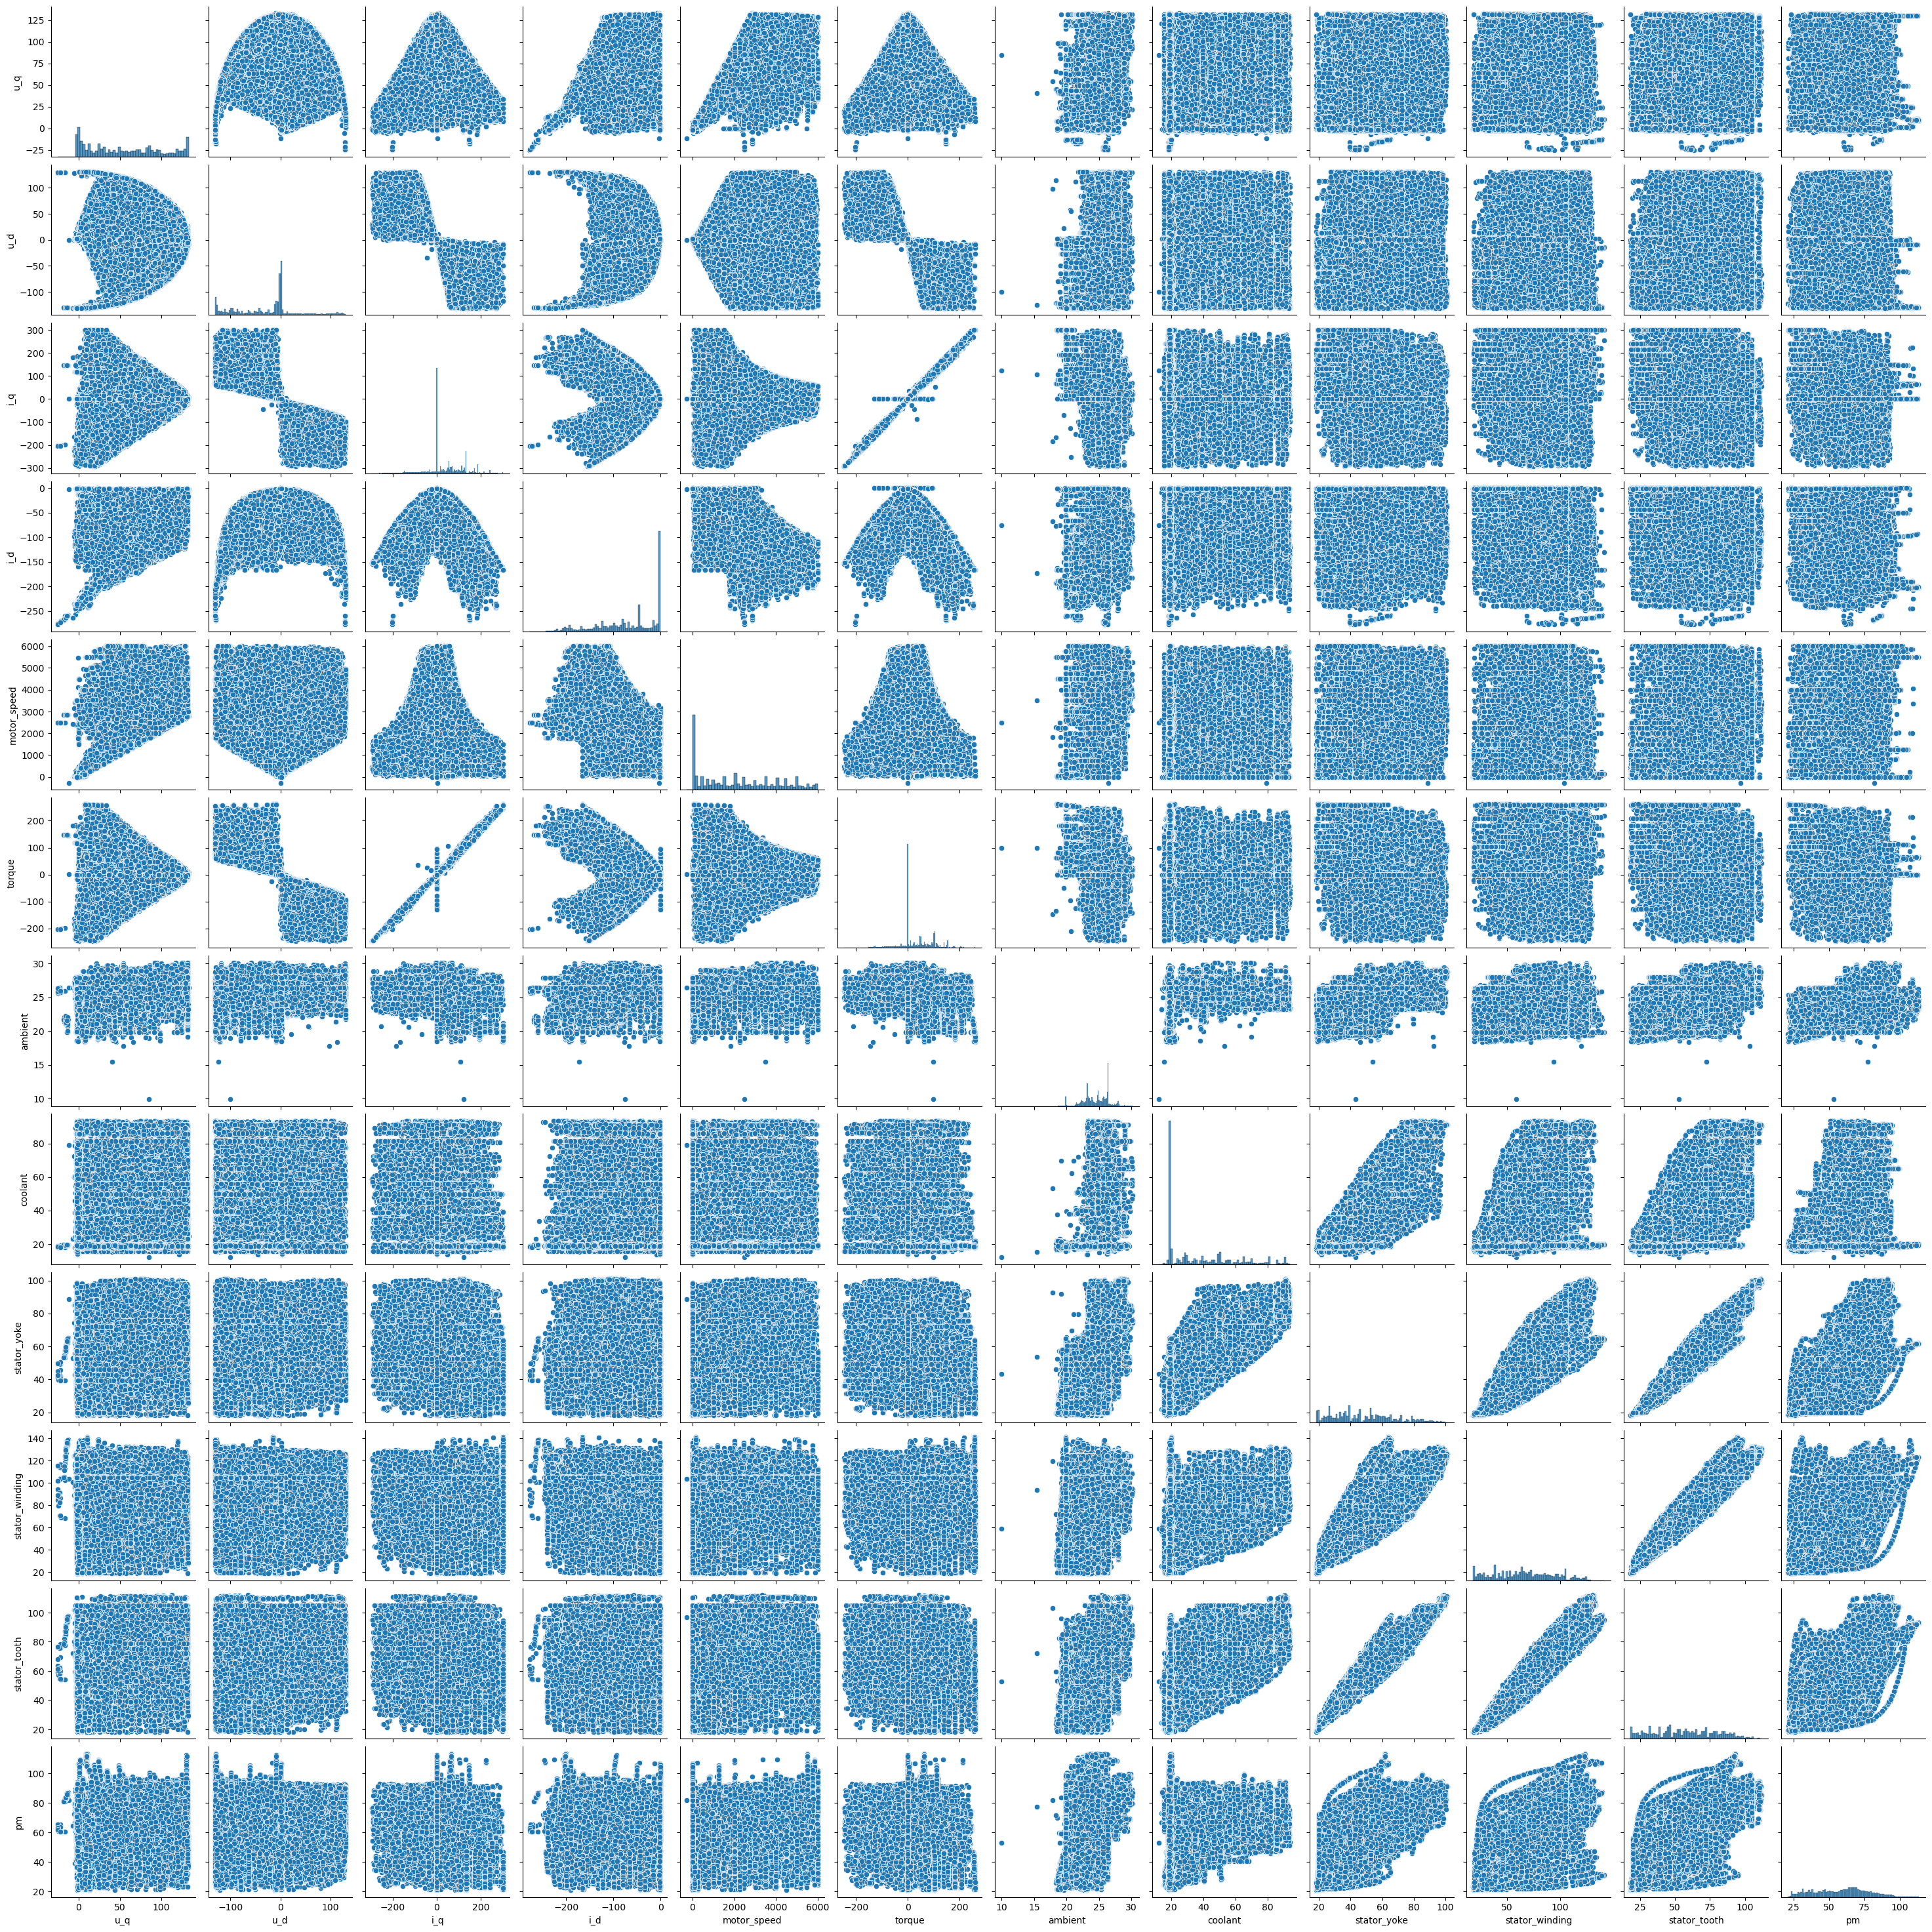

<Figure size 1000x600 with 0 Axes>

In [12]:
# Create a random sample of 25% of the dataframe
df_sample = df.sample(frac=0.10, random_state=42)

# Create a seaborn pairplot
sns.pairplot(df_sample)
plt.figure(figsize=(10, 6))
plt.show()

From the pairplot above there aren't any real key takeaways that will impact our pre-processing pipeline, however it is interesting to see the the relationship between the physical motor control variables such as `u_d` and `i_q`, along with `motor_speed` and `torque` as the shapes show the underlying physics theorems of motor control. For example the current vector `i_q` directly corresponds to the output `torque` of a motor and we see a strong linear relationship between the two. Also with the plot compare `motor_speed` and `torque` we can see where the peak torque is delivered for the corresponding motor speed. Alongside this, we can see that there are fairly strong linear relationships between many of the temperature features, which is to be expected as the components are fairly close together in proximity.

## **Feature Variance**

Feature variance is important to look at as features with low variance might not contribute useful information to the model and features with large variances might dominate others. Let's take a look at the variance of each feature below:

In [13]:
def plot_variance(df: pd.DataFrame):
    """Creates a bar plot of the variance of each feature in the dataset

    Args:
        df (pd.DataFrame): Data 
    """
    
    # Get df variance and sort values in descending order
    var_df = df.var().sort_values(ascending=False)
    
    # Plot the variance of each feature
    plt.figure(figsize=(10, 5))
    sns.barplot(x=var_df.index, y=var_df.values)
    plt.xlabel("Features")
    plt.ylabel("Variance")
    plt.title("Feature Variance")
    plt.xticks(rotation=45)
    plt.show()

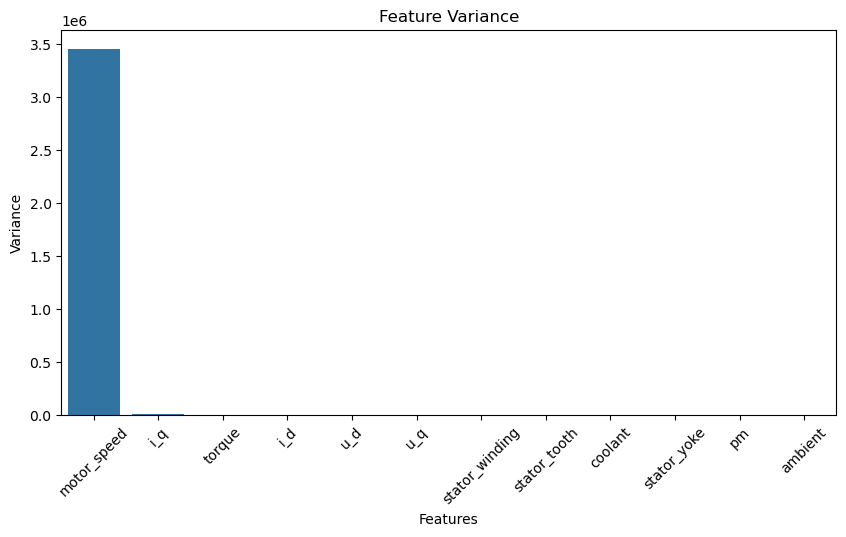

In [14]:
plot_variance(df)

We can see that `motor_speed` is dominating the other features by having a large amount of variance. Let's see what the variance of the other features looks like by temporarily removing `motor_speed` from the plot.

In [15]:
df.columns

Index(['u_q', 'u_d', 'i_q', 'i_d', 'motor_speed', 'torque', 'ambient',
       'coolant', 'stator_yoke', 'stator_winding', 'stator_tooth', 'pm'],
      dtype='object')

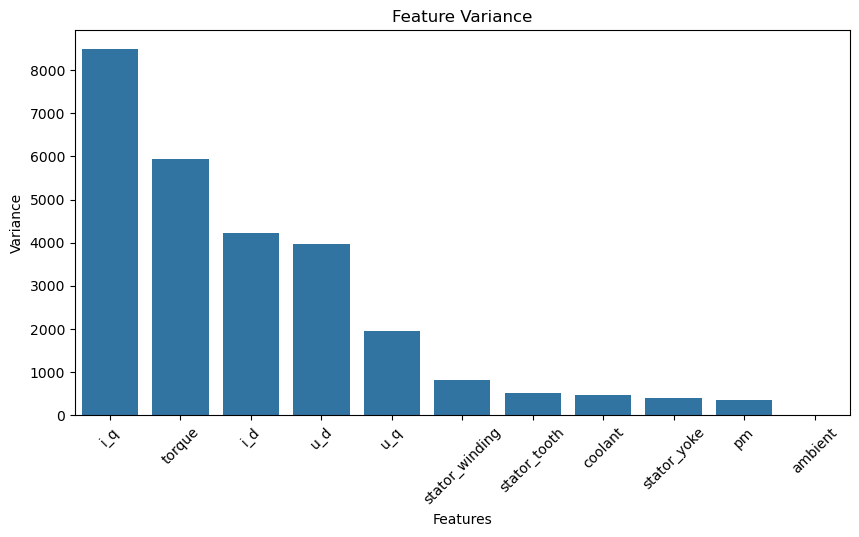

In [16]:
plot_variance(df.drop(['motor_speed'], axis=1))

Now we see that the physical motor control features have the highest degree of variation and the temperatures have the lowest. This makes sense as the motor control features will need to vary quickly to meet the load demand for the user and temperature has a longer response time to changes as a result of the motor load. With the high degree of variation, we know that we will have to scale the data such that, at the minimum, `motor_speed` does not dominate the other features. It might also be worth dropping `ambient` as it has a very low amount of variance so it might not be contributing much useful information.

## **Feature Linear Correlation**

There are many components here that, from a physics standpoint, are likely to have a high degree of correlation. For example `current` and `voltage`, or `motor speed` and `torque` likely have a high degree of interaction with one another. Let's create a linear correlation plot to represent the trends we saw in the plot above in terms of a heatmap.

In [17]:
def plot_corr_heatmap(df: pd.DataFrame):
    """Creates a heatmap of the correlation matrix of the dataframe

    Args:
        df (pd.DataFrame): Data to plot
    """
    
    # Create a correlation matrix and mask the upper triangle
    corr_matrix = df.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Create the heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        corr_matrix,
        mask = mask,
        annot = True,
        fmt = ".2f",
        cmap = 'coolwarm',
        ax = ax)
    plt.show()

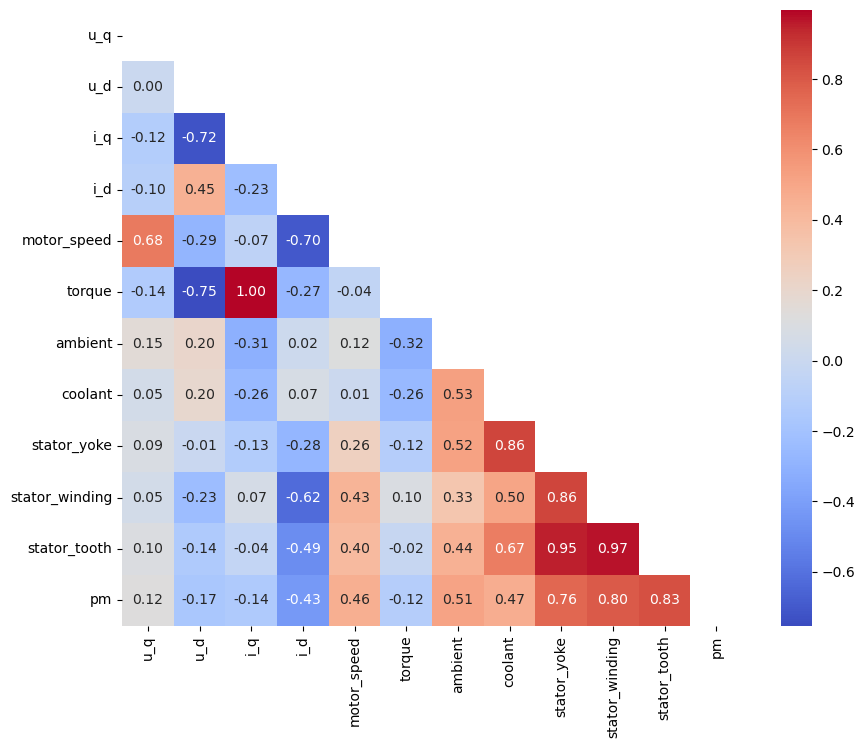

In [18]:
plot_corr_heatmap(df)

From the correlation plot above, we see that there is a high degree of correlation between the `q-component current` and `torque` which makes sense as the `q-component` is responsible for handling the output torque of the motor. There is also a high level of correlation between the `q-component voltage` and `motor speed`, which is to be expected as per the previous explanation. There is a strong **negative** correlation between the `d-component controls` and the `motor speed` and `torque` which is to be expected as the `d-component` is responsible for controlling the motor flux and field. And lastly, we see high degrees of correlation between all of the `temperature` features which makes sense as they are close in proximity and subject to heat transfer.

## **Feature Selection**

This high degree of multicollinearity can cause issues such as overfitting and unstable coefficients when training various machine learning models and it is important to only keep those features that will have a positive contribution to the pipeline. One method of feature selection is to simply drop a feature from a pair of highly correlated features which will help reduce dimensionality and overfitting. However for some models, such as `randomforestregressor` and `XGBoost`, multicollinearity is not much of an issue as the models will inherently handle correlated features by selecting the most important features first. Since we will test a number of different models to see which works the best, we can also see which features `randomforestregressor` and `XGBoost` choose and see if we can discard the least valuable ones (this will be done when testing machine learning models). Another method of feature selection is using Principle Component Analysis (PCA) to reduce the dimensionality of the data and select only those components which have a large contribution to the explainability of the data.

### _**Dropping Highly Correlated Features**_

First let's list out the highly correlated features and try to use some basic reasoning to choose which features can be dropped. We'll set a correlation threshold of 0.85 saying that correlation above this value are considered high. We currently have three temperatures for the stator, one for the stator tooth, winding, and yoke respectively and they are all highly correlated with one another and are located close together in physical proximity. Of these three, we could drop `stator_tooth` and `stator_winding` as they have higher degrees of correlation and less variance as opposed to `stator_yoke`. Both `torque` and `i_q` have very similar correlations and pair-wise distributions, however on average `torque` has higher correlation values so we can drop `torque`. Let's look at the heatmap again with these three features removed.

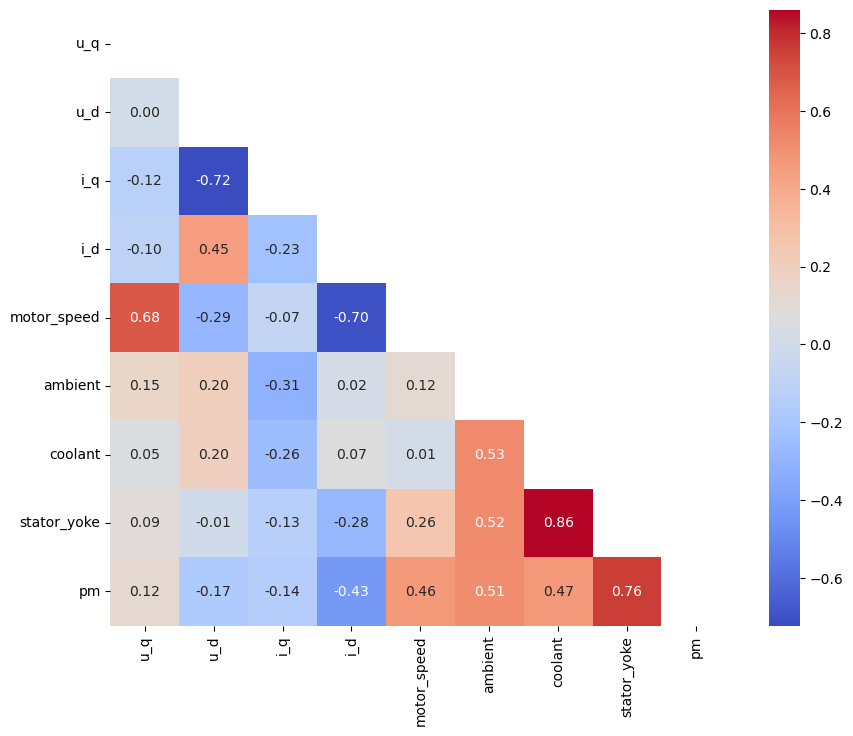

In [19]:
df_subset_1 = df.drop(['torque', 'stator_tooth', 'stator_winding'], axis=1)
plot_corr_heatmap(df_subset_1)

From the matrix above, we can see that there is much less overall correlation between features than before. We still have a correlation of 0.86 between `stator_yoke` and `coolant`, however taking away `coolant` will likely lead to an undesirable loss of important data.

### _**Dimensional Reduction Using PCA**_

Another method of inducing dimensional reduction is to use Principle Component Analysis (PCA) to reduce the number of features while keeping their inherit statistical attributes. Let's perform PCA and create a scree plot which will show us the explained variance of each principle component, and allow us to choose what dimension we want to reduce the data to.

In [20]:
def plot_scree(explained_variance: np.array):
    """Plots the scree plot of the explained variance

    Args:
        explained_variance (np.array): Explained variance from PCA
    """
    
    #Create a Scree Plot using Seaborn
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        x = np.arange(1, len(explained_variance) + 1),
        y = explained_variance,
        marker = "o",
        linestyle = "--",
        color = "b"
    )

    # Labels and title
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.title("Scree Plot (Explained Variance vs. Components)")

    # Add horizontal reference lines
    plt.axhline(y=0.90, color="r", linestyle="--", label="90% Variance")
    plt.axhline(y=0.95, color="g", linestyle="--", label="95% Variance")
    
    # Show the plot
    plt.legend()
    plt.show()

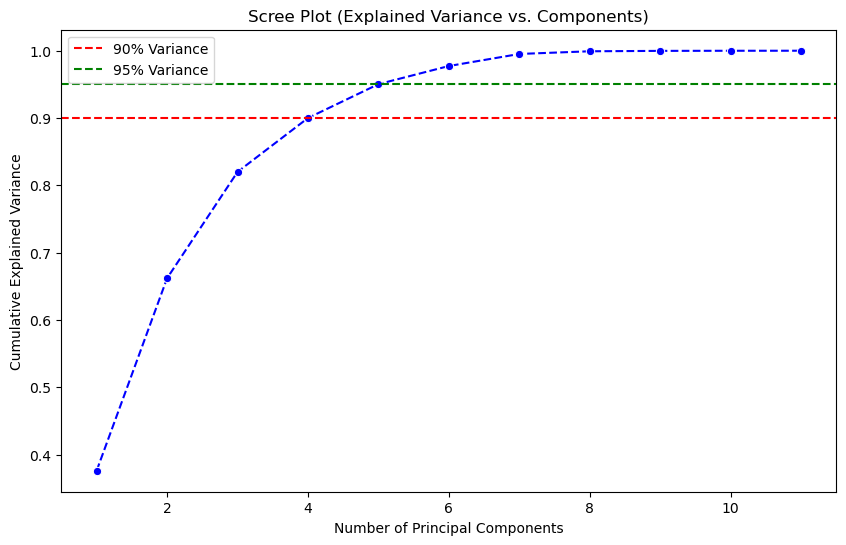

In [21]:
# Create dataset using only the features
feature_df = df.drop('pm', axis=1)

# Standardize the features
scaler = StandardScaler()
feature_df_scaled = scaler.fit_transform(feature_df)

# Create and fit PCA object
pca = PCA()
pca.fit(feature_df_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plot_scree(explained_variance)

The scree plot above shows that if we want to explain $95\%$ of the variance in the data we could reduce the data to 5 principle components, and if we want to explain $90\%$ of the data we can reduce it to 4 components instead. Since the difference between $95\%$ and $90\%$ is only one feature, it is more desirable to select 5 feature for the added variance explanation.

## **Conclusion**

When we inspected the **variance** of the features, we saw that `motor_control` had a very high degree of variance which dominates the rest of the features and `ambient` has a very low degree meaning that it does not contribute much information as the ambient temperatures will not vary much observation to observation. As such we concluded that the data will need to be **scaled** and `ambient` can be **dropped** from the data set. After taking a look a the correlations, we saw that there were many features which had high degree of correlation meaning the dataset had a good amount of multicollinearity. We deduced that `torque`, `stator_teeth`, and `stator_winding` could be **dropped** from the dataset to reduce multicollinearity. In the end if we follow this method, we would have 8 features. After applying PCA the data we observed that if we want to explain $95\%$ of the data we can reduce the dimensionality to 5 principle component, three less than the other method. There is no true way to determine which method is better as of yet. The next step is to experiment with a few machine learning models too determine which preprocessing method leads to better results.